In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import exp
from math import pi

In [2]:
df = pd.read_csv('attacktimes.txt')

Text(0,0.5,'Times')

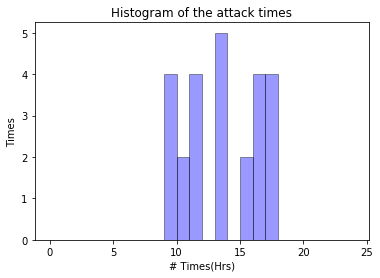

In [3]:
#2 a) (5 points) Plot a histogram of the attacks times
sns.distplot(df['# Times(Hrs)'],hist=True,kde=False,bins=24,color='blue',hist_kws={'edgecolor':'black','range':(0,24)})
plt.title('Histogram of the attack times')
plt.ylabel('Times')

In [4]:
#2 b)From this data, estimate the probability of attack in each hour,H,Pa(H)
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
groups=df.groupby(pd.cut(df['# Times(Hrs)'],bins))
print("probability of attack in each hour is")
groups.count()/25

probability of attack in each hour is


,# Times(Hrs)
# Times(Hrs),
"(1, 2]",0.00
"(2, 3]",0.00
"(3, 4]",0.00
"(4, 5]",0.00
"(5, 6]",0.00
"(6, 7]",0.00
"(7, 8]",0.00
"(8, 9]",0.00
"(9, 10]",0.16


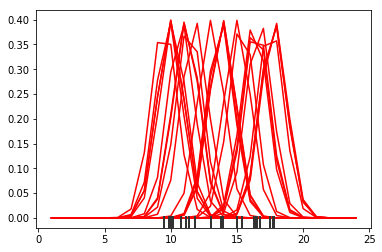

In [5]:
#2 c) Compute the KDE for the above 25 points based on the above definition
#KDE defines the smoothened probability density function as:
h=1
Xi = np.linspace(1, 24, 24)
kernels = []
for xj in df['# Times(Hrs)']:
    u = (Xi-xj)/np.abs(h)
    kernel = (1/(np.sqrt(2*pi)*np.abs(h)))*np.exp(-u*u/2)
    kernels.append(kernel)
    plt.plot(Xi, kernel, color="r")
sns.rugplot(df['# Times(Hrs)'], color=".2", linewidth=2);

[3.81450640e-18 1.16620265e-14 1.33480619e-11 5.76425951e-09
 9.48602489e-07 6.02011532e-05 1.49382195e-03 1.47775114e-02
 6.07388292e-02 1.14806803e-01 1.19800121e-01 8.92934339e-02
 8.36466727e-02 9.45044473e-02 8.96507032e-02 1.00931755e-01
 1.11707488e-01 8.22350438e-02 3.10487515e-02 4.98499742e-03
 3.11098812e-04 7.30339617e-06 6.37807582e-08 2.06348108e-10]


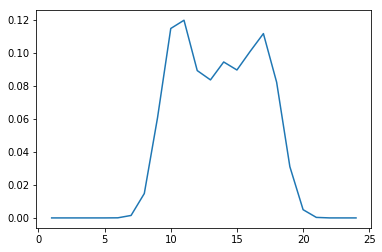

In [6]:
#2cIntegrate
#these curves are summed to compute the value of the density at each point
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, Xi)
print(density)
plt.plot(Xi, density);

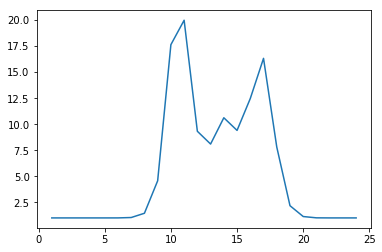

In [7]:
#without using scipy integrate--optional
manual = np.exp(np.sum(kernels, axis=0))
plt.plot(Xi, manual);

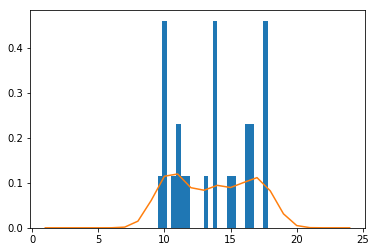

In [8]:
#2.c and plot it together with the histogram
plt.hist(df['# Times(Hrs)'],bins=24,normed=True)
plt.plot(Xi, density)

In [9]:
#2 d) Using the KDE estimate, re-estimate the probability of attack for each hour,  Pa(H).
probability=0
for r in range(0,24):
    print(density[r])
    probability=probability+np.sum(density[r])
print(probability)

3.8145063971270944e-18
1.1662026481954738e-14
1.3348061922448517e-11
5.764259506292138e-09
9.486024886162486e-07
6.020115322473364e-05
0.001493821947248684
0.014777511382478776
0.0607388292109308
0.11480680265633522
0.11980012086909024
0.08929343392518074
0.08364667271062949
0.09450444726389412
0.08965070318579196
0.10093175498388074
0.11170748757194532
0.08223504379414216
0.031048751457016112
0.004984997415811742
0.0003110988121866204
7.303396172362355e-06
6.378075816096837e-08
2.0634810837960702e-10
1.000000000103174


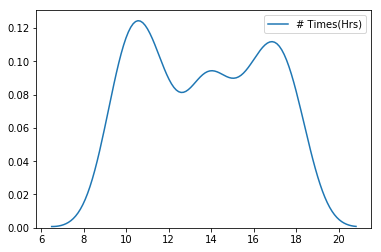

In [10]:
#using KDE -cross verification 
sns.kdeplot(df['# Times(Hrs)'],kernel='gau',bw=1)

[3.81450640e-18 1.16620265e-14 1.33480619e-11 5.76425951e-09
 9.48602489e-07 6.02011533e-05 1.49382195e-03 1.47775114e-02
 6.07388293e-02 1.14806803e-01 1.19800121e-01 8.92934340e-02
 8.36466728e-02 9.45044473e-02 8.96507032e-02 1.00931755e-01
 1.11707488e-01 8.22350438e-02 3.10487515e-02 4.98499742e-03
 3.11098812e-04 7.30339618e-06 6.37807582e-08 2.06348109e-10]
1.0000000007768346


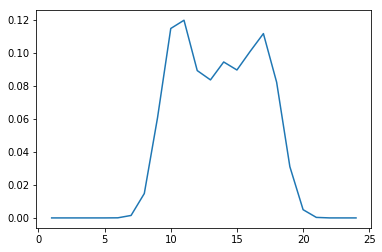

In [11]:
# Get probability for range of values--cross verification
from sklearn.neighbors import KernelDensity
start =1  # Start of the range
end = 24    # End of the range
N =24   # Number of evaluation points 
step = (end - start) / (N - 1)  # Step size
kd = KernelDensity(kernel='gaussian', bandwidth=1).fit(df)
s = np.linspace(start, end, N)[:, np.newaxis]  # Generate values in the range
kd_vals = np.exp(kd.score_samples(s))  # Get PDF values for each x
probability = np.sum(kd_vals * step)# Approximate the integral of the PDF
print(kd_vals)
print(probability)
plt.plot(s, kd_vals)
plt.show()

For a KDE (or any Probability density function), probability is obtained by calculating the integral over a range of values.It will lead to the probability 0 for a specific value.So we calculate the probability for a range of values.